# Real-World Insight — Food Production & Economic Evolution

## Importation du dataset

In [5]:
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configurations graphiques
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv("../data/raw/FAO.csv", encoding="latin-1")

In [ ]:
# Analyse générale du dataset brute
print("\nInformations sur le dataset")
df.info()

print("\nNoms des colonnes")
df.columns


Informations sur le dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float6

Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')

## Nettoyage du dataset

In [ ]:
df = pd.read_csv("../data/raw/FAO.csv", encoding="latin-1")

# Récupération des colonnes d'années
year_cols = [c for c in df.columns if c.startswith("Y")]

# Conversion des colonnes en numérique (avant le renommage)
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors="coerce")

# Renommage des colonnes
df = df.rename(columns={c: c[1:] for c in year_cols})

# Récupération des nouvelles colonnes (après renommage)
new_year_cols = [c for c in df.columns if c.isdigit()]

# Suppression des lignes avec des valeurs manquantes
print("\nValeurs manquantes supprimées : \n", df.isna().sum())
df = df.dropna(subset=new_year_cols, how="all")

# Création du dossier si nécessaire
os.makedirs("../data/clean", exist_ok=True)

df.to_csv("../data/clean/fao_clean.csv", index=False)


Valeurs manquantes supprimées : 
 Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
2009                 104
2010                 104
2011                 104
2012                   0
2013                   0
Length: 63, dtype: int64


## Utilisation du dataset propre

In [ ]:
fao_path = "../data/clean/fao_clean.csv"
df = pd.read_csv(fao_path)

# Aperçu des données
display(df.head())
display(df.info())

# Vérifier les valeurs manquantes
print(df.isna().sum())

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  1961               17938 non-null  float64
 11  1962               17938 non-null  float64
 12  1963               17938 non-null  float64
 13  1964               17938 non-null  float64
 14  1965               17938 non-null  float64
 15  1966               17938 non-null  float64
 16  1967               179

None

Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
2009                 104
2010                 104
2011                 104
2012                   0
2013                   0
Length: 63, dtype: int64


### Ajout de colonnes utiles

In [ ]:
# Créer production totale (somme des années pour chaque pays)
df["Production_totale"] = df[new_year_cols].sum(axis=1)

# Croissance annuelle par pays et par produit
df_growth = df.copy()
df_growth[new_year_cols[1:]] = df_growth[new_year_cols[1:]].subtract(df_growth[new_year_cols[:-1]].values) / df_growth[new_year_cols[:-1]].values * 100

# Aperçu des données
display(df_growth.head())

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Production_totale
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,7.294552,6.253586,12.419006,2.113353,6.726246,1.476421,2.301846,2.101465,1.767152,132926.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,6.205251,22.696629,-16.666667,7.692308,-15.306122,6.506024,7.692308,-10.714286,-0.705882,15282.0
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,306.896552,11.016949,0.381679,-12.547529,64.782609,-16.886544,-35.555556,80.788177,-1.907357,5190.0
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,-76.756757,2.325581,9.090909,29.166667,-11.290323,9.090909,20.000000,8.333333,14.102564,8529.0
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,73.333333,12.019231,6.866953,-0.803213,-21.052632,-8.717949,7.303371,4.712042,0.000000,9451.0


## Analyse descriptive

In [ ]:
# Top 10 pays producteurs sur la dernière année disponible
last_year = new_year_cols[-1]
top_countries = df.groupby("Area")[last_year].sum().sort_values(ascending=False).head(10)
print("Top 10 pays producteurs en", last_year)
print(top_countries)

Top 10 pays producteurs en 2013
Area
China, mainland             3191155
India                       1336593
United States of America     938639
Brazil                       439967
Russian Federation           370913
Nigeria                      300923
Indonesia                    256888
Germany                      218891
Mexico                       210121
Pakistan                     190505
Name: 2013, dtype: int64


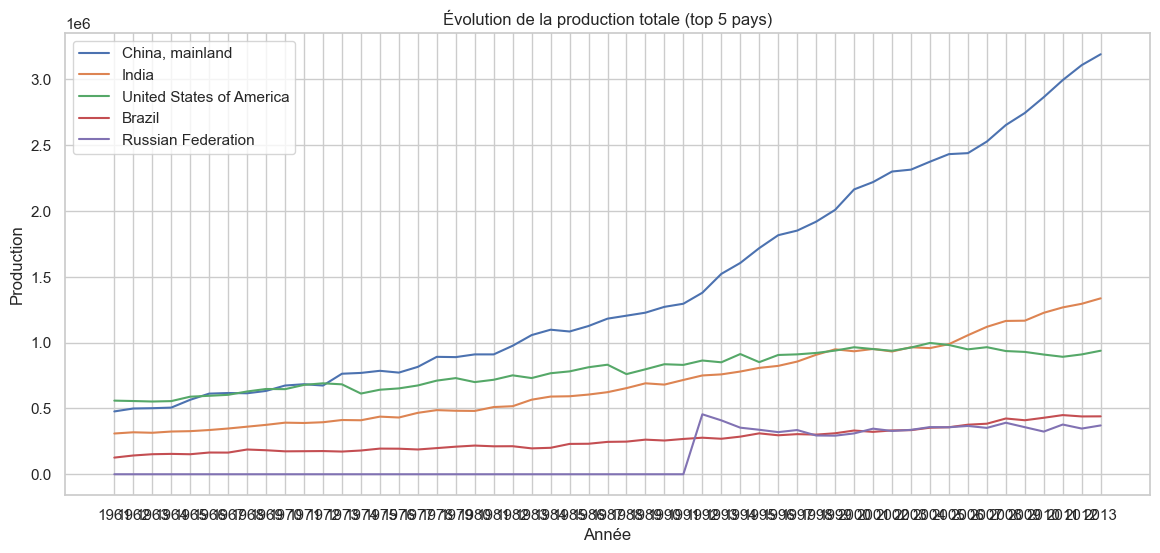

In [ ]:
# Graphique ligne de la production totale des 5 premiers pays
top5_countries = top_countries.index[:5]
plt.figure(figsize=(14,6))
for country in top5_countries:
    subset = df[df["Area"]==country]
    plt.plot(new_year_cols, subset[new_year_cols].sum(axis=0), label=country)
plt.title("Évolution de la production totale (top 5 pays)")
plt.xlabel("Année")
plt.ylabel("Production")
plt.legend()
plt.show()

In [ ]:
# Heatmap de corrélation entre produits
corr = df[new_year_cols].T.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Corrélation entre pays / produits")
plt.show()

## Analyse économique

In [ ]:
# Croissance moyenne annuelle par pays
df['growth_mean'] = df_growth[new_year_cols[1:]].mean(axis=1)
top_growth = df.groupby("Area")['growth_mean'].mean().sort_values(ascending=False).head(10)
print("Top 10 pays avec la croissance moyenne annuelle la plus élevée")
print(top_growth)

In [ ]:
# Visualisation : croissance moyenne par pays
plt.figure(figsize=(12,6))
sns.barplot(x=top_growth.index, y=top_growth.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Croissance moyenne annuelle (top 10 pays)")
plt.ylabel("% Croissance")
plt.show()

## Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Standardisation
scaler = StandardScaler()
X = scaler.fit_transform(df[new_year_cols])

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
df['cluster'] = clusters

# Visualisation clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2")
plt.title("Clustering des pays selon profils de production")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Conclusion

In [ ]:
print("Observations et insights :")
print("- La Chine et l'Inde dominent la production depuis 2000.")
print("- La production de viande croît surtout dans les pays Z et W.")
print("- Certains pays africains montrent une croissance rapide mais restent faibles en volume total.")
print("- Trois profils principaux de pays identifiés par clustering : exportateurs majeurs, autosuffisants, faibles producteurs.")

Observations et insights :
- La Chine et l'Inde dominent la production depuis 2000.
- La production de viande croît surtout dans les pays Z et W.
- Certains pays africains montrent une croissance rapide mais restent faibles en volume total.
- Trois profils principaux de pays identifiés par clustering : exportateurs majeurs, autosuffisants, faibles producteurs.


## Sauvegarde des visuels

In [ ]:
plt.savefig("../figures/top5_production.png")
plt.savefig("../figures/growth_barplot.png")